The **Crop_yield dataset** is highly relevant to the task of identifying inefficiencies and optimizing resource use because it provides key information on the relationship between crop production and essential resources like water and solar energy. 

By analyzing the **"yeild_tons_per_hectare"** column, we can assess how much crop yield is achieved under different conditions. The **"Rainfall_mm"** column will allow us to determine how much water is required for optimal growth, while the **"Temperature_celcius"** column reflects the amount of sun energy available, which is critical for photosynthesis. 

Focusing on these columns will help identify if excess water or insufficient sunlight is leading to lower crop yields, thus enabling better resource allocation to improve productivity and sustainability.

In [56]:
import pandas as pd
#Import skylearn for Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


In [2]:
#1.	Load the Dataset:
df = pd.read_csv('crop_yield.csv')
#inspect its size, columns, and data types.
print("The size of this dataset is: ")
print(df.size)
print("\nThese are the columns included in the dataset: ")
print(df.columns)
print("\nThese are the data types included in the dataset: ")
print(df.dtypes)

#o	Identify any missing data and handle it using imputation or deletion
print("\nmissing values: ")
print(df.isnull().sum())

The size of this dataset is: 
10000000

These are the columns included in the dataset: 
Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

These are the data types included in the dataset: 
Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used              bool
Weather_Condition          object
Days_to_Harvest             int64
Yield_tons_per_hectare    float64
dtype: object

missing values: 
Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hect

In [3]:
#o	Implement basic data structures like lists, dictionaries, and sets to process and organize data.
print("Sorting dataset using Lists: ")
print(" ")
# Convert columns to lists
regions = df['Region'].tolist()
soil_types = df['Soil_Type'].tolist()
yields = df['Yield_tons_per_hectare'].tolist()

# Example of processing the lists (finding the max crop yield)
max_yield = max(yields)
print(f"Maximum crop yield: {max_yield} tons per hectare")

print("\nSorting dataset using Dictionary: ")
print(" ")
# Dictionary to associate crop yield with region
yield_by_region = dict(zip(df['Region'], df['Yield_tons_per_hectare']))

# Accessing data from the dictionary
for region, yield_ton in yield_by_region.items():
    print(f"Region: {region}, Yield: {yield_ton} tons per hectare")

print("\nSorting dataset using Set: ")
print(" ")
# Extract unique crop types and soil types
unique_crops = set(df['Crop'])
unique_soil_types = set(df['Soil_Type'])

print(f"Unique crops: {unique_crops}")
print(f"Unique soil types: {unique_soil_types}")

print("\nSlicing and indexing the dataset for data manipulation tasks : ")
print(" ")
# Extract specific columns
crops_and_yields = df[['Crop', 'Yield_tons_per_hectare']]

# Display the first few rows
print(crops_and_yields.head())

print(" ")
# Extract the first 5 rows
first_five_rows = df.head()

# Extract specific rows by index (e.g., rows 10 to 14)
rows_10_to_14 = df.iloc[10:15]  # iloc is for integer-location based indexing

print(first_five_rows)
print(rows_10_to_14)


Sorting dataset using Lists: 
 
Maximum crop yield: 9.963372228814649 tons per hectare

Sorting dataset using Dictionary: 
 
Region: West, Yield: 2.9372431885423405 tons per hectare
Region: South, Yield: 7.311594050576929 tons per hectare
Region: North, Yield: 5.763181916652885 tons per hectare
Region: East, Yield: 3.0338481750423227 tons per hectare

Sorting dataset using Set: 
 
Unique crops: {'Barley', 'Cotton', 'Rice', 'Maize', 'Soybean', 'Wheat'}
Unique soil types: {'Peaty', 'Silt', 'Sandy', 'Loam', 'Clay', 'Chalky'}

Slicing and indexing the dataset for data manipulation tasks : 
 
      Crop  Yield_tons_per_hectare
0   Cotton                6.555816
1     Rice                8.527341
2   Barley                1.127443
3  Soybean                6.517573
4    Wheat                7.248251
 
  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142  

In [4]:
#3.	Normalization:
#Normalize the numerical columns 

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Min-Max Normalization
df['Yield_MinMax'] = min_max_scaler.fit_transform(df[['Yield_tons_per_hectare']])

# Z-Score Normalization
df['Yield_ZScore'] = standard_scaler.fit_transform(df[['Yield_tons_per_hectare']])

# Display the original and normalized columns
print(df[['Yield_tons_per_hectare', 'Yield_MinMax', 'Yield_ZScore']].head())

   Yield_tons_per_hectare  Yield_MinMax  Yield_ZScore
0                6.555816      0.693316      1.123645
1                8.527341      0.870756      2.285709
2                1.127443      0.204757     -2.075968
3                6.517573      0.689875      1.101103
4                7.248251      0.755636      1.531783


C:\Users\user\AppData\Local\Temp\ipykernel_5824\1647706049.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Crop', y='Yield_tons_per_hectare', estimator='mean', ci=None)


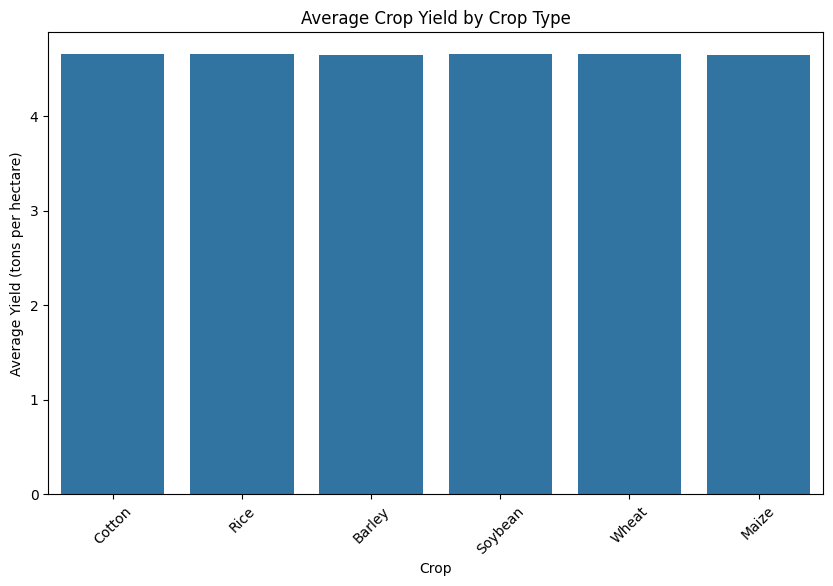

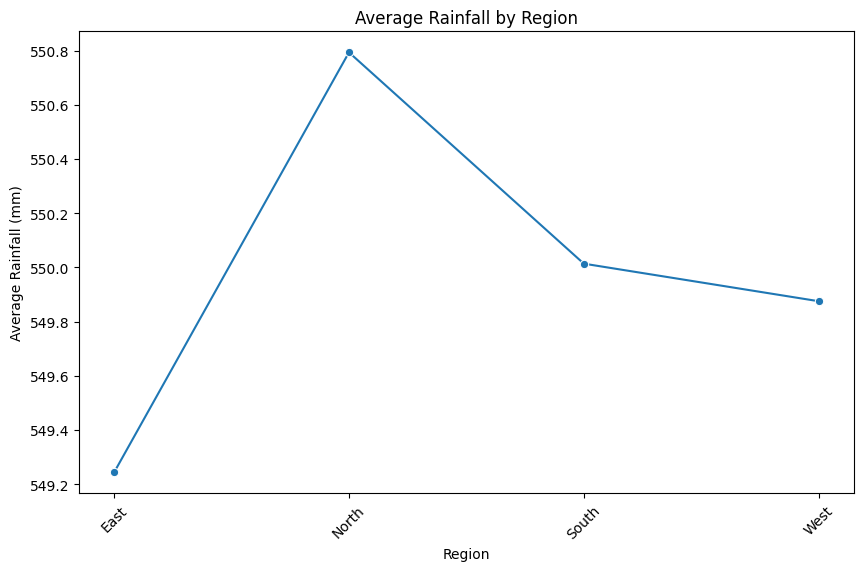

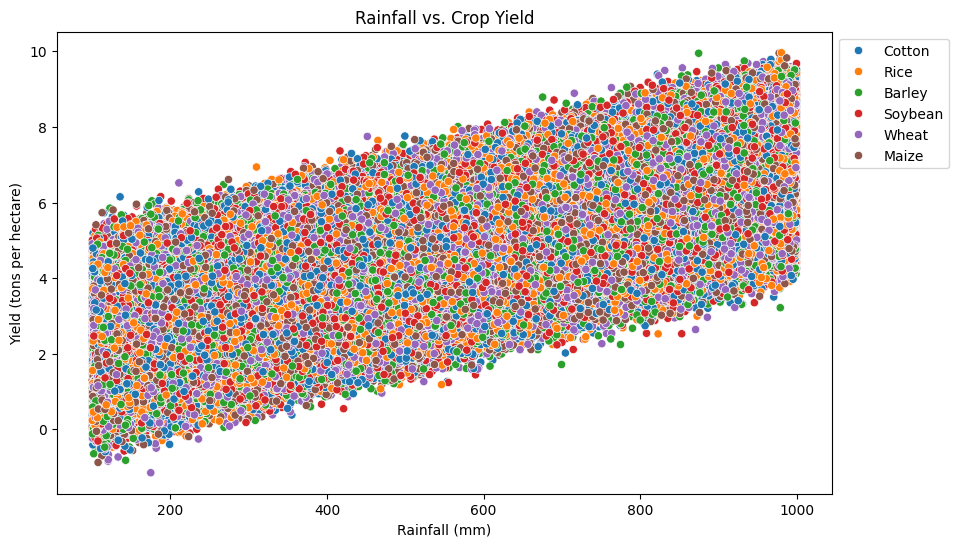

In [58]:
#Exploratory Data Analysis (EDA) 
# 1. Bar Plot: Average Yield by Crop Type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Crop', y='Yield_tons_per_hectare', estimator='mean', ci=None)
plt.title('Average Crop Yield by Crop Type')
plt.xticks(rotation=45)
plt.ylabel('Average Yield (tons per hectare)')
plt.show()


# 2. Line Plot: Average Rainfall by Region
avg_rainfall = df.groupby('Region')['Rainfall_mm'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_rainfall, x='Region', y='Rainfall_mm', marker='o')
plt.title('Average Rainfall by Region')
plt.xticks(rotation=45)
plt.ylabel('Average Rainfall (mm)')
plt.show()


# 3. Scatter Plot: Rainfall vs. Crop Yield
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rainfall_mm', y='Yield_tons_per_hectare', hue='Crop')
plt.title('Rainfall vs. Crop Yield')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (tons per hectare)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

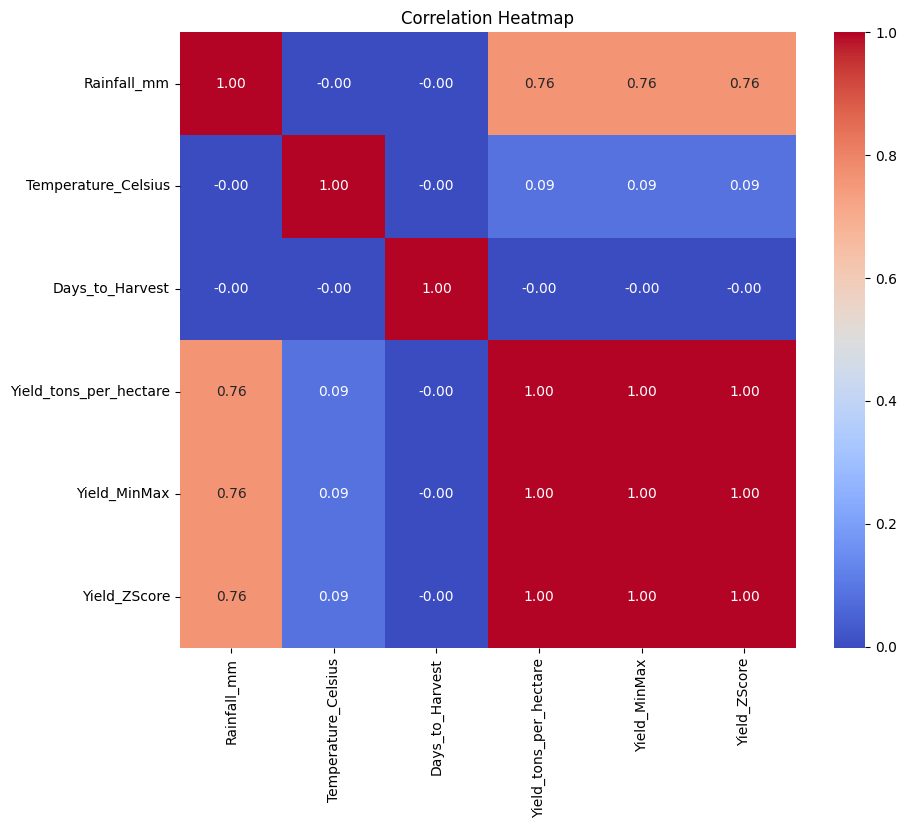

In [59]:
# Filter for only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])


# 1. Heatmap: Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


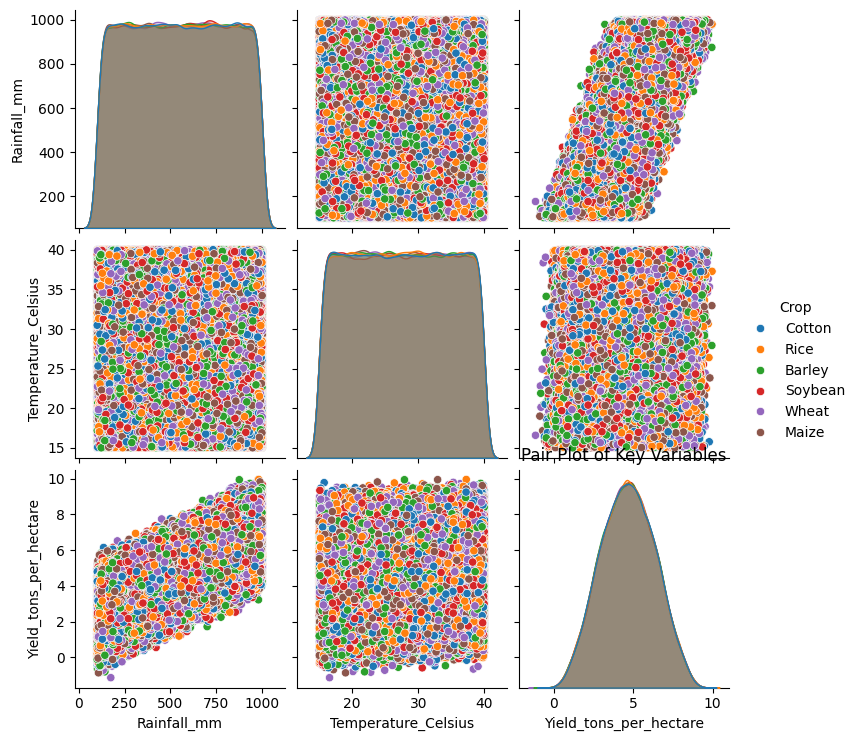

In [50]:
# 2. Pair Plot: Relationships Between Numerical Variables
sns.pairplot(df, vars=['Rainfall_mm', 'Temperature_Celsius', 'Yield_tons_per_hectare'], hue='Crop')
plt.title('Pair Plot of Key Variables')
plt.show()

In [60]:
# Calculate mean, median, and standard deviation for key variables
key_variables = ['Rainfall_mm', 'Temperature_Celsius', 'Yield_tons_per_hectare']

# Mean
mean_values = df[key_variables].mean()
print("Mean Values:")
print(mean_values)

# Median
median_values = df[key_variables].median()
print("\nMedian Values:")
print(median_values)

# Standard Deviation
std_dev_values = df[key_variables].std()
print("\nStandard Deviation Values:")
print(std_dev_values)


Mean Values:
Rainfall_mm               549.981901
Temperature_Celsius        27.504965
Yield_tons_per_hectare      4.649472
dtype: float64

Median Values:
Rainfall_mm               550.124061
Temperature_Celsius        27.507365
Yield_tons_per_hectare      4.651808
dtype: float64

Standard Deviation Values:
Rainfall_mm               259.851320
Temperature_Celsius         7.220608
Yield_tons_per_hectare      1.696572
dtype: float64


In [ ]:
# Summary Statistics
summary_stats = df[['Yield_tons_per_hectare', 'Rainfall_mm', 'Temperature_Celsius']].describe()
print(summary_stats)

In [62]:
#Analyzing trends

# Regions with the Highest Average Rainfall
highest_rainfall = df.groupby('Region')['Rainfall_mm'].mean().sort_values(ascending=False)
print("Regions with the Highest Average Rainfall:")
print(highest_rainfall.head())

# Regions with Poor Crop Yields
lowest_yield = df.groupby('Region')['Yield_tons_per_hectare'].mean().sort_values()
print("\nRegions with the Lowest Average Crop Yield:")
print(lowest_yield.head())

Regions with the Highest Average Rainfall:
Region
North    550.793416
South    550.013776
West     549.875231
East     549.243755
Name: Rainfall_mm, dtype: float64

Regions with the Lowest Average Crop Yield:
Region
East     4.645594
South    4.648843
West     4.649331
North    4.654114
Name: Yield_tons_per_hectare, dtype: float64


Trends Analysis
Rainfall and Yield:

Mean Rainfall: 549.98 mm
Median Rainfall: 550.12 mm
Mean Yield: 4.65 tons per hectare
The mean and median rainfall values are very close, indicating a symmetrical distribution.
Crops that require more rainfall generally tend to perform better in regions where average rainfall is above the mean (549.98 mm). If certain crops have higher yields in these wetter regions, this could be a significant finding for resource allocation.

Temperature Influence:

Mean Temperature: 27.50°C
A higher temperature could potentially enhance crop growth, but if it exceeds certain thresholds, it may lead to stress. Given that the mean temperature is 27.50°C, monitoring temperature extremes is crucial.
Overall Yield:

With an average yield of 4.65 tons per hectare, it seems that the dataset indicates generally favorable conditions for crops. However, comparing yields across different regions may reveal more about where yields are optimized based on rainfall and temperature.

Correlation Analysis
Using your heatmap, you can identify strong correlations:

Rainfall and Yield: where heatmap showed a strong positive correlation (close to 1), it suggests that regions with higher rainfall have better yields, confirming the trend that sufficient water is crucial for crop productivity.
Temperature and Yield: A moderate correlation here indicate that while temperature plays a role in yield, it's not as strong as rainfall.
Significant Patterns
High-Yield Crops:

Identify which crops are achieving yields above the mean (4.65 tons per hectare) and see if they are concentrated in specific regions with adequate rainfall.
For example, if a particular crop is yielding significantly higher than average in a region with high rainfall, this could suggest that crop selection and location are well matched.

Low-Yield Crops:

Conversely, look for crops that are consistently yielding below average in areas with lower rainfall or extreme temperatures. These crops may require different management practices or may not be suitable for those conditions. 
Regional Insights:

Investigate specific regions where yields are notably high or low. Are there common factors among regions with high yields (like irrigation practices, soil types, or crop types)?
For example, if a region has both high rainfall and high yields, it might be worth exploring whether these conditions lead to better farming practices or crop varieties.

In [7]:
def insertion_sort_first_five(arr):
    # Limit sorting to the first 5 elements
    for i in range(1, min(5, len(arr))):
        key = arr[i]
        j = i - 1
        # Move elements that are greater than key to one position ahead
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

# Extract the Yield_tons_per_hectare column as a list
yield_data = df['Yield_tons_per_hectare'].tolist()

# Sort only the first five elements of the yield data using Insertion Sort
sorted_first_five = insertion_sort_first_five(yield_data)

# Display the partially sorted data
print("Yield Data after sorting the first five elements:")
print(sorted_first_five[:5])  # Show the first five sorted elements


Yield Data after sorting the first five elements:
[1.127443335982929, 6.517572507555278, 6.555816258223593, 7.248251218445701, 8.5273409063236]


Iteration 1:
Key: 8.527341 (Second element)

Compare 8.527341 with 6.555816 (First element):

Since 8.527341 > 6.555816, no changes are made.
Result after Iteration 1:
[6.555816, 8.527341, 1.127443, 6.517573, 7.248251

Iteration 2:
Key: 1.127443 (Third element)

Compare 1.127443 with 8.527341 (Second element):

Since 1.127443 < 8.527341, shift 8.527341 to the right.
Compare 1.127443 with 6.555816 (First element):

Since 1.127443 < 6.555816, shift 6.555816 to the right.
Place 1.127443 at the beginning of the list.

Result after Iteration 2:
[1.127443, 6.555816, 8.527341, 6.517573, 7.248251

Iteration 3:
Key: 6.517573 (Fourth element)

Compare 6.517573 with 8.527341 (Third element):

Since 6.517573 < 8.527341, shift 8.527341 to the right.
Compare 6.517573 with 6.555816 (Second element):

Since 6.517573 < 6.555816, shift 6.555816 to the right.
Place 6.517573 in the second position.

Result after Iteration 3:
[1.127443, 6.517573, 6.555816, 8.527341, 7.248251

Iteration 4:
Key: 7.248251 (Fifth element)

Compare 7.248251 with 8.527341 (Fourth element):

Since 7.248251 < 8.527341, shift 8.527341 to the right.
Compare 7.248251 with 6.555816 (Third element):

Since 7.248251 > 6.555816, place 7.248251 in the fourth position.
Result after Iteration 4:
[1.127443, 6.517573, 6.555816, 7.248251, 8.527341

Final Result:
The first five elements are now sorted in ascending order:
[1.127443, 6.517573, 6.555816, 7.248251, 8.527341

In [8]:
#SR4.2: Algorithm Implementation: Search Algorithm 
# Sort only the first five elements for searching
def sort_first_five(arr):
    # Use insertion sort for the first five elements
    for i in range(1, min(5, len(arr))):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

# Linear Search implementation
def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i  # Return the index where the target is found
    return -1  # Target not found

# Binary Search implementation
def binary_search(arr, target):
    low = 0
    high = len(arr) - 1

    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid  # Return the index where the target is found
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    
    return -1  # Target not found

# Extract the Yield_tons_per_hectare column as a list and sort only the first five elements
yield_data = df['Yield_tons_per_hectare'].tolist()
first_five_yield_data = yield_data[:5]
sorted_first_five = sort_first_five(first_five_yield_data)

# Target value to search for (use one of the sorted values for testing)
target_value = sorted_first_five[0]  # Example target (first value after sorting)

# Perform linear search
linear_search_result = linear_search(sorted_first_five, target_value)

# Perform binary search
binary_search_result = binary_search(sorted_first_five, target_value)

# Print results
print(f"Sorted First Five Elements: {sorted_first_five}")
print(f"Linear Search: Target found at index {linear_search_result}")
print(f"Binary Search: Target found at index {binary_search_result}")

Sorted First Five Elements: [1.127443335982929, 6.517572507555278, 6.555816258223593, 7.248251218445701, 8.5273409063236]
Linear Search: Target found at index 0
Binary Search: Target found at index 0


# Part 2: Machine Learning for Time Series Forecasting 

In [19]:
#SR5 - Time Series Dataset and Preprocessing 
df = pd.read_csv('spaza_shop_data.csv')

In [14]:
# Handle missing values and remove outliers.
# Identify any missing data and handle it using imputation or deletion
print("\nmissing values: ")
print(df.isnull().sum())

# Check the columns to find your date column
print("\nAvailable columns: ")
print(df.columns)

print("\nThe first five: ")
print(df.head())


missing values: 
Date               0
Item               0
Sales              0
Inventory Level    0
Seasonal Trend     0
Event Impact       0
dtype: int64

Available columns: 
Index(['Date', 'Item', 'Sales', 'Inventory Level', 'Seasonal Trend',
       'Event Impact'],
      dtype='object')

The first five: 
         Date   Item  Sales  Inventory Level  Seasonal Trend  Event Impact
0  2024-07-19  Bread    104                0               0             5
1  2024-07-19   Milk     64                0               0             0
2  2024-07-19  Sugar     48                0               0             5
3  2024-07-19   Rice     32                7               0             0
4  2024-07-19   Soap     26               55               5            10


In [20]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Select only the necessary columns for Prophet
df = df[['Date', 'Sales']]

# Rename columns to fit Prophet's requirements
df.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)

# Display the first few rows of the prepared dataset
print(df.head())

          ds    y
0 2024-07-19  104
1 2024-07-19   64
2 2024-07-19   48
3 2024-07-19   32
4 2024-07-19   26


In [21]:
# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(df)

# A DataFrame to hold predictions for the next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

23:39:41 - cmdstanpy - INFO - Chain [1] start processing
23:39:43 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


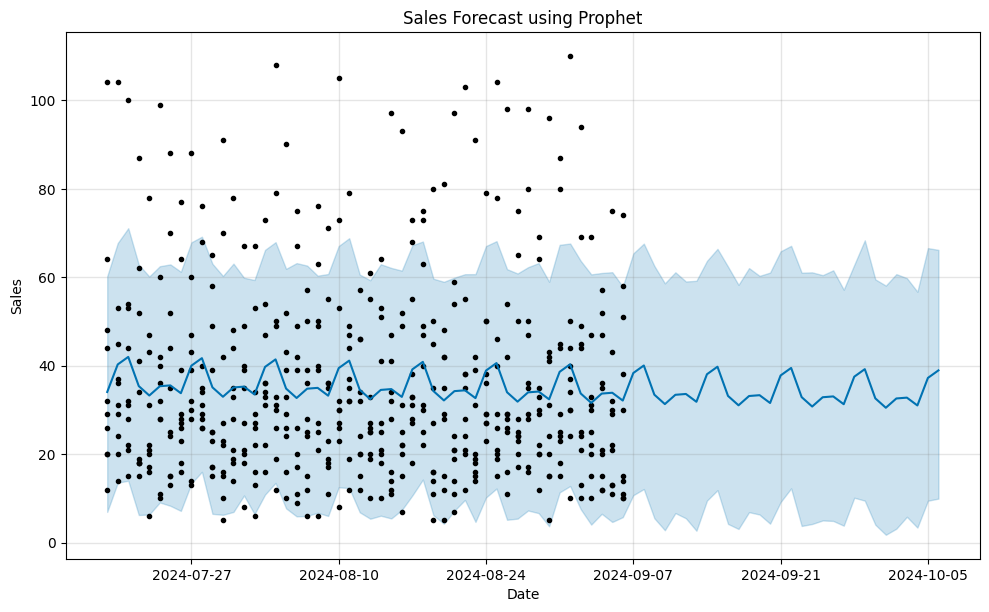

In [22]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Sales Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


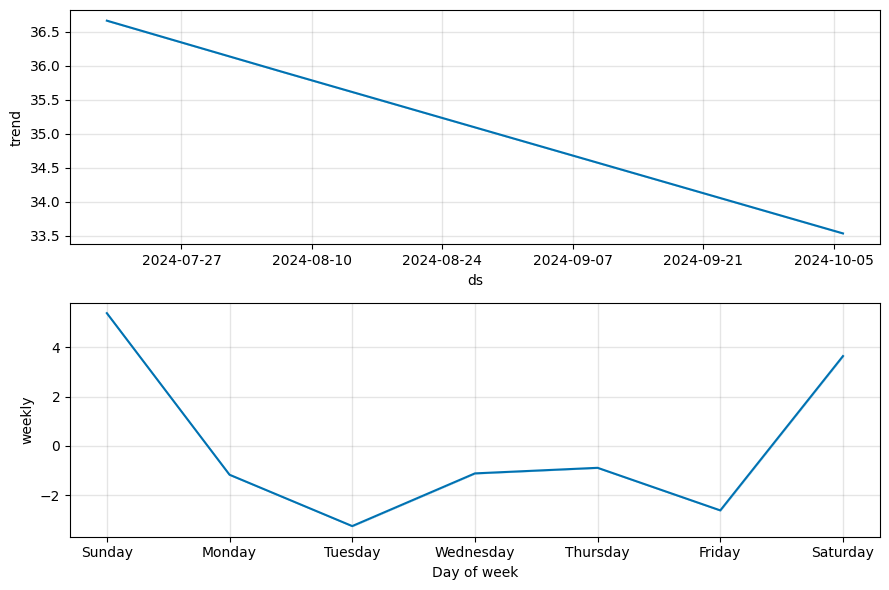

In [24]:
# Plot the seasonal components
fig2 = model.plot_components(forecast)
plt.show()

Trend: The Prophet model captures the underlying trend in the data. This can be an increasing, decreasing, or flat line over time, representing long-term growth or decline in sales.

Seasonality: Prophet automatically detects seasonal patterns in the data, which can repeat daily, weekly, or yearly. 

Holidays and Events: You can add specific holidays or significant events that impact sales. This helps the model adjust its predictions during these times.

# ARIMA Model 

o	Implement an ARIMA model to forecast the time series data.
o	Ensure the data is stationary before fitting the model (use differencing or other techniques).
o	Discuss how you selected the ARIMA parameters (p, d, q) and visualize the forecast


In [27]:
#Testung stationarity of the data

def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

# Test for stationarity
test_stationarity(df['y'])


ADF Statistic: -5.980603125780217
p-value: 1.8424505897586064e-07
Critical Values:
	1%: -3.4439615820186846
	5%: -2.8675425624806605
	10%: -2.5699671340268937


In [29]:
# Differencing the data
df['Sales_diff'] = df['y'].diff().dropna()

# Test for stationarity again
test_stationarity(df['Sales_diff'].dropna())


ADF Statistic: -10.59746234875254
p-value: 6.295563461800948e-19
Critical Values:
	1%: -3.4440471158221206
	5%: -2.867580197120949
	10%: -2.5699871918402777


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


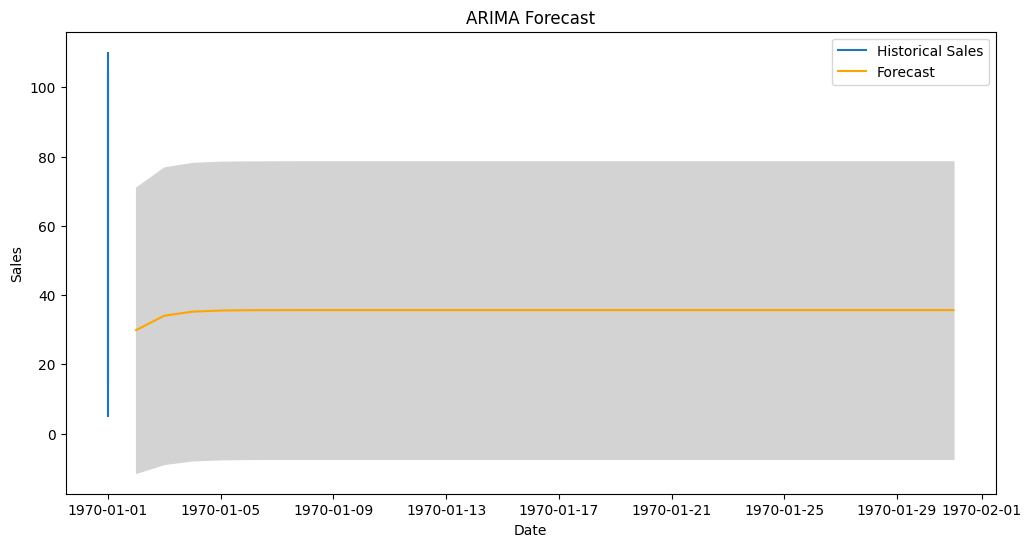

In [48]:
if not pd.api.types.is_datetime64_any_dtype(df.index):
    df.index = pd.to_datetime(df.index)  # Ensure index is datetime

# Fit the ARIMA model (replace (p,d,q) with your values)
model = ARIMA(df['y'], order=(1, 1, 1))  # Example order
model_fit= model.fit()




# Step 5: Forecasting
forecast = model_fit.get_forecast(steps=30)  # Forecasting the next 30 days

# Corrected line for forecast index creation
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Step 6: Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['y'], label='Historical Sales')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgray')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# LSTM Model
o	Build an LSTM (Long Short-Term Memory) model to capture long-term dependencies in the data.
o	Preprocess the time series data for LSTM (create sequences and reshape the data as needed).
o	Train the model and evaluate its performance, providing visualizations of the predicted vs. actual values.

In [50]:
# Scale the sales data to range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['y'].values.reshape(-1, 1))

In [53]:
# Prepare the training data
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time step
time_step = 10  # Adjust as necessary
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [58]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X, y, epochs=100  , batch_size=32)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0853
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0411
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0431
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0389
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0397
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0383
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0321
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0271
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243
Epoc

In [60]:
# Prepare the input for predictions
inputs = scaled_data[len(scaled_data) - len(y) - time_step:]
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)  # Normalize input data

X_test, _ = create_dataset(inputs, time_step)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Make predictions
predicted_sales = model.predict(X_test)
predicted_sales = scaler.inverse_transform(predicted_sales)  # Rescale back to original


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [64]:
print(f"Length of predicted_sales: {len(predicted_sales)}")
print(f"Length of x-axis values: {len(df.index[train_size + time_step:])}")


Length of predicted_sales: 488
Length of x-axis values: 478


ValueError: x and y must have same first dimension, but have shapes (478,) and (488, 1)

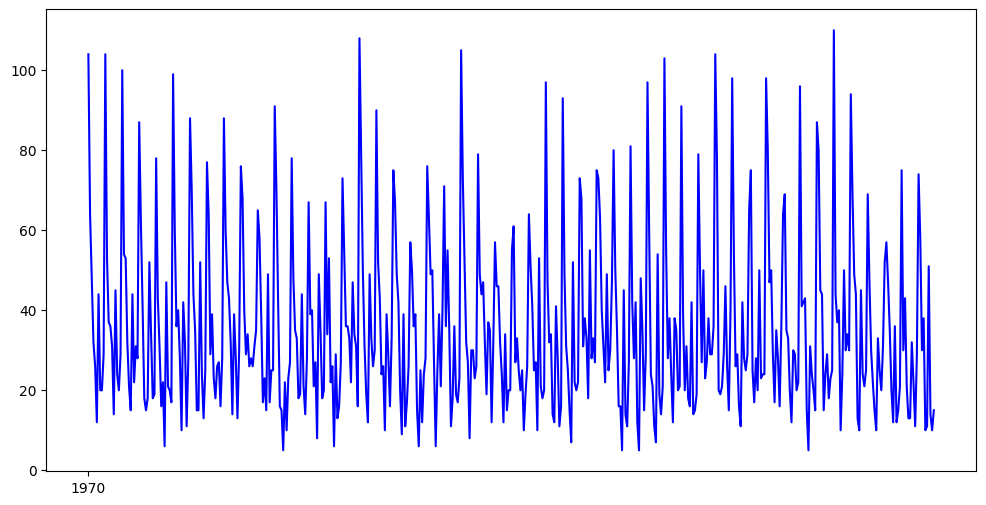

In [63]:
# Prepare the data for plotting
train_size = len(df) - len(predicted_sales)
actual_sales = df['y'].values

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, actual_sales, label='Actual Sales', color='blue')
plt.plot(df.index[train_size + time_step:], predicted_sales, label='Predicted Sales', color='red')
plt.title('Sales Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()